Explicabilidad del mejor modelo del segundo experimento

In [1]:
# importar paquetes importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [2]:
# Cargar el archivo CSV 
dataframe = pd.read_csv("datosFinales.csv")

# Mostrar los primeros registros del DataFrame
dataframe.head(5)

,ciclo_academico,region,porcentaje_de_beca,edad,aab1_nota,acdb1_nota,apeb1_nota,aab2_nota,acdb2_nota,apeb2_nota,...,Estatus_curso,Discapacidad,Status,Tipo_de_pago,Descripcion_beca,Descripcion_descuento,Convenios_contratos,Formas_pago,Tipo_discapacidad,Curso
0,6,0,10.0,24.0,3.05,3.5,3.00,3.12,3.50,1.50,...,0,0,0,2,0,0,0,1,4,28
1,6,0,10.0,24.0,2.81,3.5,2.60,1.79,3.35,2.51,...,0,0,0,2,0,0,0,1,4,24
2,6,0,10.0,24.0,2.69,3.5,2.75,2.56,3.50,2.65,...,0,0,0,2,0,0,0,1,4,25
3,6,0,10.0,24.0,1.97,3.5,1.52,2.11,3.35,3.00,...,0,0,0,2,0,0,0,1,4,26
4,6,0,10.0,24.0,2.64,3.5,2.63,2.61,2.80,2.55,...,0,0,0,2,0,0,0,1,4,27


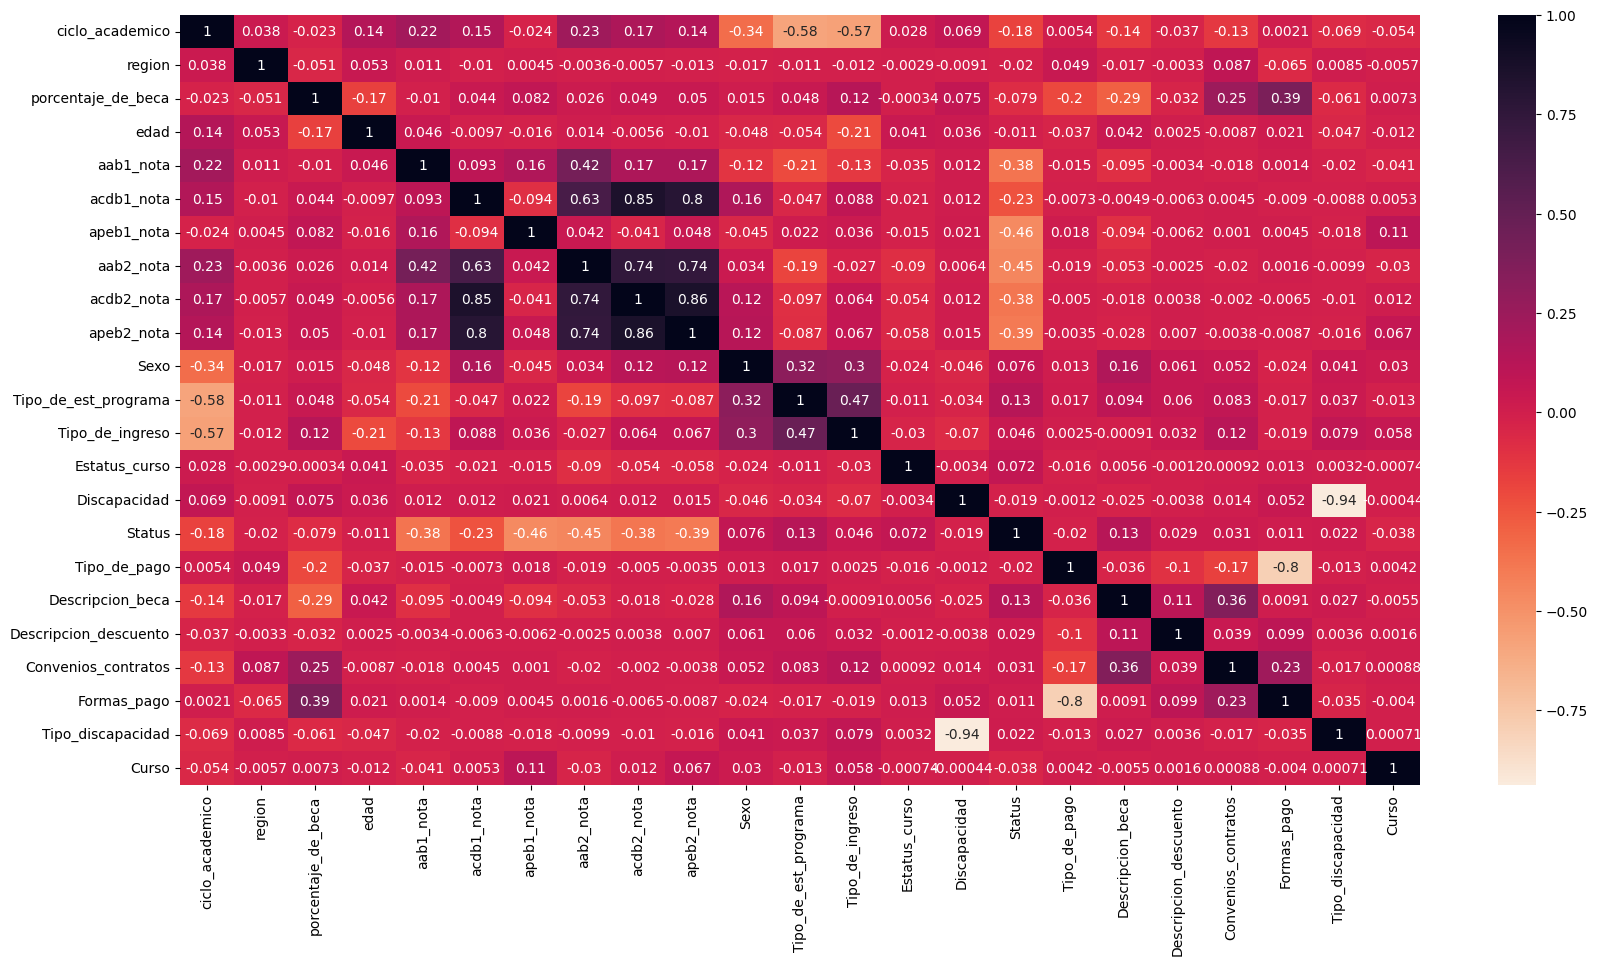

In [4]:
correlation = dataframe.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='rocket_r')

# Mostrar el gráfico
plt.show()

In [4]:
# Dividir los datos en caracteristicas de entrada y de destino
# Features
x = dataframe.drop("Status" , axis=1)
#x.info()
y = dataframe['Status']
#y.info()# Target variable

In [5]:
###spliting data
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
#Dividir en conjunto de entrenamiento(train) y prueba(test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=0)
# Utilizar RandomUnderSampler para balancear las clases
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)


In [6]:
print("Shape")
print("x_new", X_resampled.shape)
print("y_new", y_resampled.shape)

Shape
x_new (5868, 22)
y_new (5868,)


Status
0    19168
1     3655
Name: count, dtype: int64


Text(0, 0.5, 'Número de aprobados y reprobados')

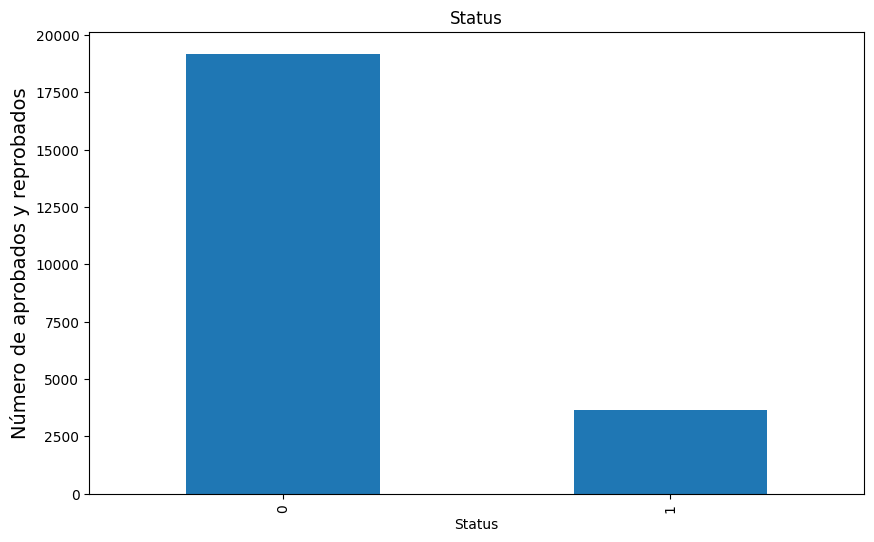

In [6]:
print(dataframe['Status'].value_counts())
ax = dataframe['Status'].value_counts().plot(kind='bar', figsize=(10,6))
ax.set_title('Status')
ax.set_ylabel('Número de aprobados y reprobados', fontsize=14)

In [7]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 15324, 1: 2934})


In [7]:
# Creata el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=30, random_state=42)
#Construimos el modelo sobre los datos de entrenamiento

rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_leaf_nodes=30, random_state=42)

In [8]:
#Predecimos para los valores del grupo Test
y_pred = rf_model.predict(X_test)

In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear un DataFrame con las características y las predicciones
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Mostrar el DataFrame con las predicciones
print(predictions_df)

       Actual  Predicted
8960        0          0
4367        0          0
1086        0          0
6771        0          0
12143       0          0
...       ...        ...
6029        0          1
15392       1          1
20143       0          0
16416       0          0
11374       0          0

[4565 rows x 2 columns]


In [10]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9305585980284775

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      3844
           1       0.70      0.97      0.82       721

    accuracy                           0.93      4565
   macro avg       0.85      0.95      0.89      4565
weighted avg       0.95      0.93      0.93      4565


Confusion Matrix:
 [[3546  298]
 [  19  702]]


In [14]:
#Agregamos a la variable feature_cols todas las varibles que se considera en el modelo
feature_cols= pd.DataFrame(data=None, columns= X_resampled.columns)
print(feature_cols)

Empty DataFrame
Columns: [ciclo_academico, region, porcentaje_de_beca, edad, aab1_nota, acdb1_nota, apeb1_nota, aab2_nota, acdb2_nota, apeb2_nota, Sexo, Tipo_de_est_programa, Tipo_de_ingreso, Estatus_curso, Discapacidad, Tipo_de_pago, Descripcion_beca, Descripcion_descuento, Convenios_contratos, Formas_pago, Tipo_discapacidad, Curso]
Index: []

[0 rows x 22 columns]


In [15]:
#Lo agregamos a una lista
type(feature_cols)
feature_cols=feature_cols.columns.tolist()
type(feature_cols)

list

In [16]:
#Agregamos a la variable class_cols la varible a predecir
class_cols=['Aprobado','Reprobado']
print(class_cols)

['Aprobado', 'Reprobado']


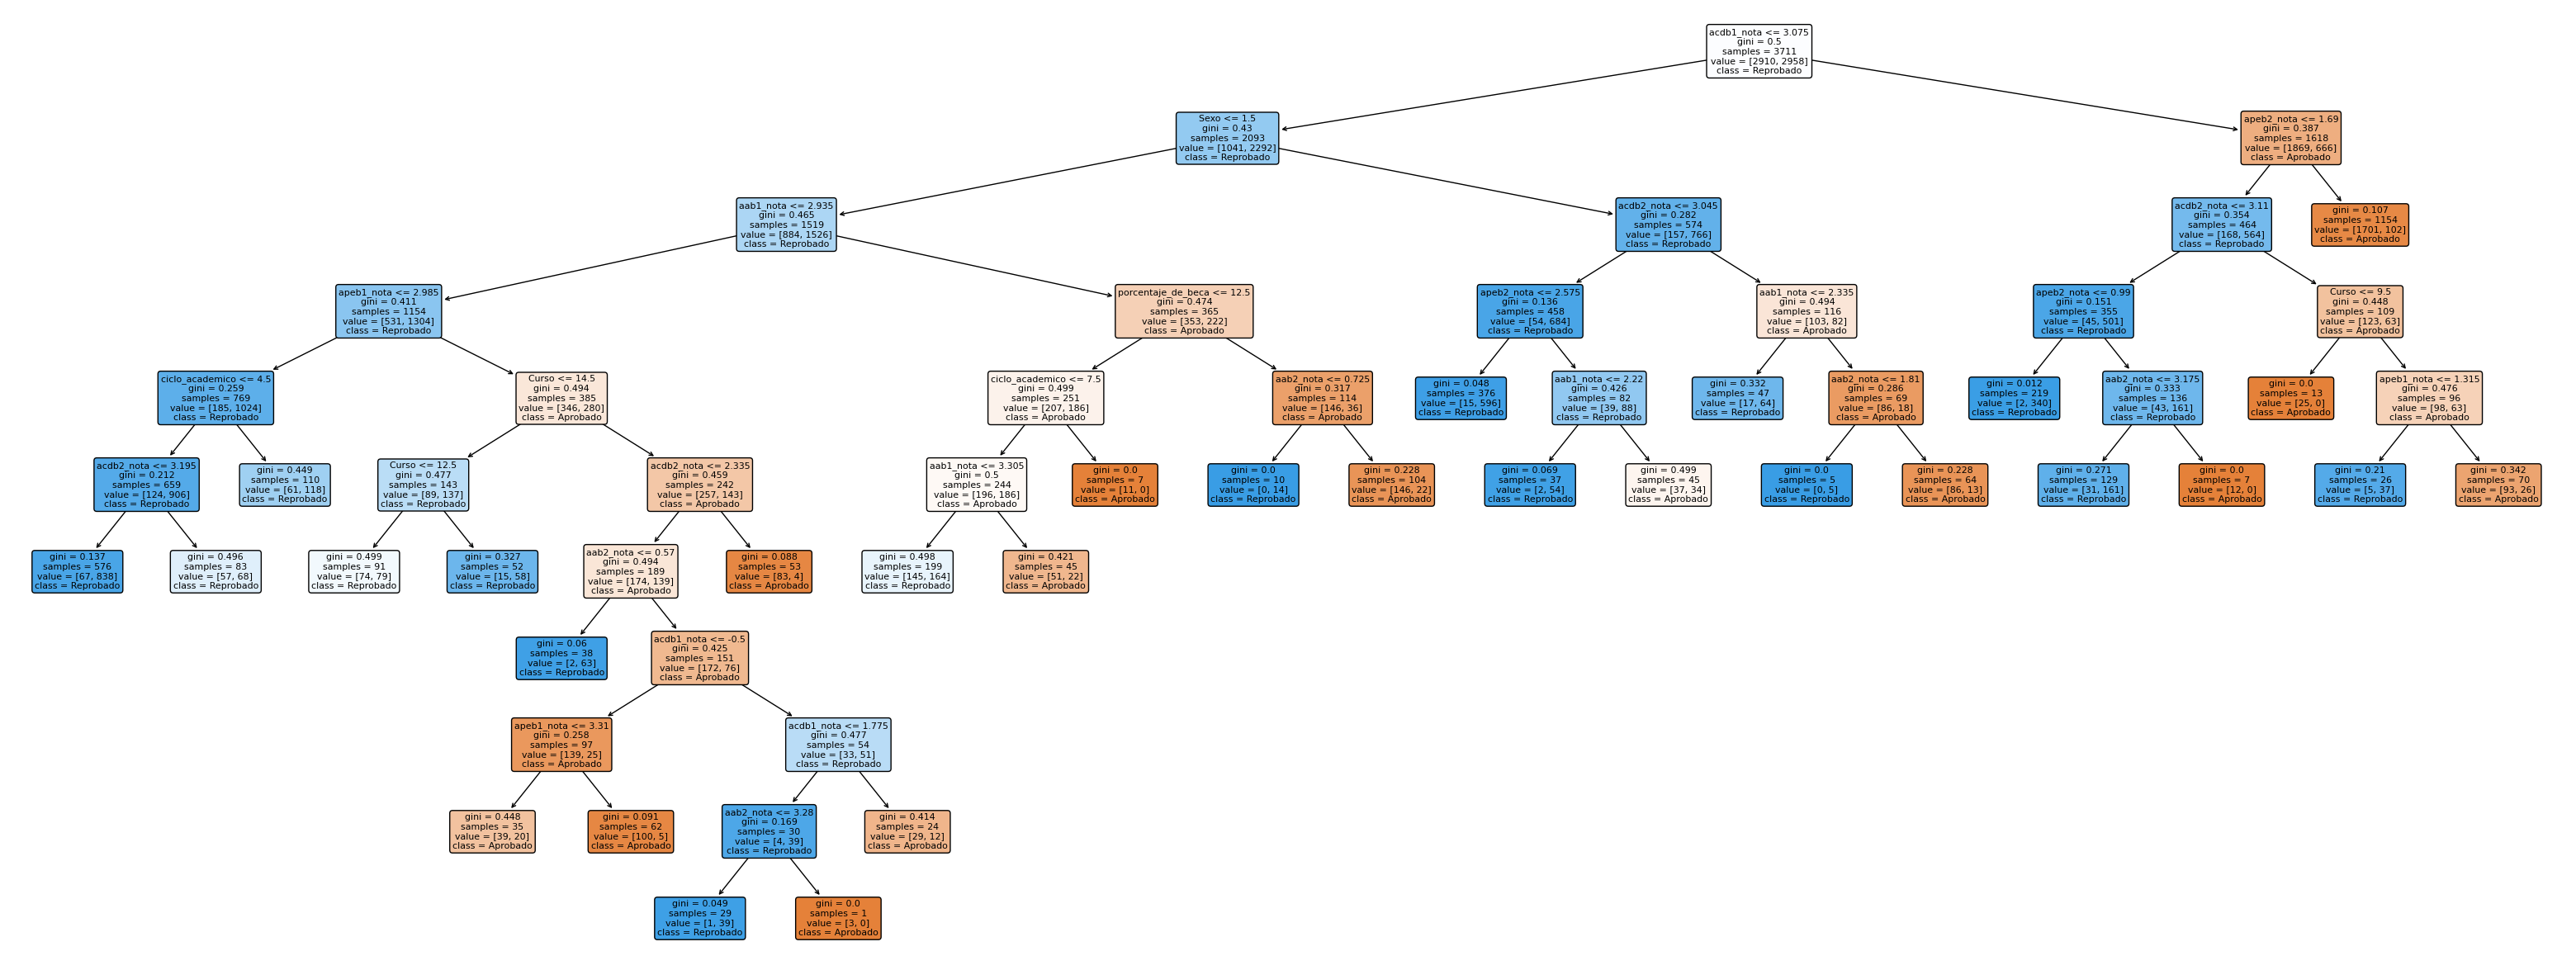

In [26]:
from sklearn.tree import plot_tree
#Creamos el arbol de decision del modelo
fig , ax = plt.subplots(figsize=(40, 15))
plot_tree(rf_model.estimators_[0], feature_names=feature_cols, class_names=class_cols, filled=True, rounded=True, ax=ax)
plt.show()
# Guardar la figura en un archivo PNG
fig.savefig('arbol_decision.png')

In [27]:
# Supongamos que 'rf_model' es tu modelo Random Forest entrenado
from sklearn.tree import export_text

# Visualiza el primer árbol del Random Forest
tree_rules = export_text(rf_model.estimators_[0], feature_names=list(X_resampled.columns))
print(tree_rules)

|--- acdb1_nota <= 3.07
|   |--- Sexo <= 1.50
|   |   |--- aab1_nota <= 2.94
|   |   |   |--- apeb1_nota <= 2.99
|   |   |   |   |--- ciclo_academico <= 4.50
|   |   |   |   |   |--- acdb2_nota <= 3.20
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- acdb2_nota >  3.20
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ciclo_academico >  4.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- apeb1_nota >  2.99
|   |   |   |   |--- Curso <= 14.50
|   |   |   |   |   |--- Curso <= 12.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Curso >  12.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Curso >  14.50
|   |   |   |   |   |--- acdb2_nota <= 2.33
|   |   |   |   |   |   |--- aab2_nota <= 0.57
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- aab2_nota >  0.57
|   |   |   |   |   |   |   |--- acdb1_nota <= -0.50
|   |   |   |   |   |   |   |   |--- apeb1_nota <= 3.31
|   |   |   |   |   |   |   |   | 

In [11]:
# Evaluate the model
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3546  298]
 [  19  702]]
Precisión del modelo:
0.702
Exactitud del modelo:
0.9305585980284775
Sensibilidad del modelo:
0.9736477115117892
Puntaje F1 del modelo:
0.8158047646717025
Curva ROC - AUC del modelo:
0.9480621492002235


In [18]:
# Supongamos que 'rf_model' es tu modelo Random Forest entrenado
importances = rf_model.feature_importances_

# Asocia cada importancia con el nombre de la característica correspondiente
feature_importance_dict = dict(zip(X_resampled.columns, importances))

# Ordena las características por importancia
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Imprime o visualiza las importancias de las características
print(sorted_feature_importance)

[('acdb2_nota', 0.28648421546390224), ('apeb2_nota', 0.19558497822047735), ('apeb1_nota', 0.143800017107297), ('acdb1_nota', 0.13914364260606743), ('aab2_nota', 0.10593527629077706), ('aab1_nota', 0.0712757645709254), ('ciclo_academico', 0.019776905299116427), ('porcentaje_de_beca', 0.01485114134669768), ('Curso', 0.0050701108981411275), ('Tipo_de_est_programa', 0.004939473272060886), ('Sexo', 0.004682481738707278), ('Descripcion_beca', 0.0027798828544183547), ('edad', 0.0024641928741687257), ('Tipo_de_ingreso', 0.0012467227252818075), ('Formas_pago', 0.0008014406975749153), ('Convenios_contratos', 0.000518833088699766), ('Tipo_de_pago', 0.0004438612703438246), ('Estatus_curso', 0.00014357061250296638), ('Descripcion_descuento', 5.748906283984784e-05), ('region', 0.0), ('Discapacidad', 0.0), ('Tipo_discapacidad', 0.0)]


In [19]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_resampled.columns), "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
8,acdb2_nota,0.286484
9,apeb2_nota,0.195585
6,apeb1_nota,0.143800
5,acdb1_nota,0.139144
7,aab2_nota,0.105935
4,aab1_nota,0.071276
0,ciclo_academico,0.019777
2,porcentaje_de_beca,0.014851
21,Curso,0.005070
11,Tipo_de_est_programa,0.004939


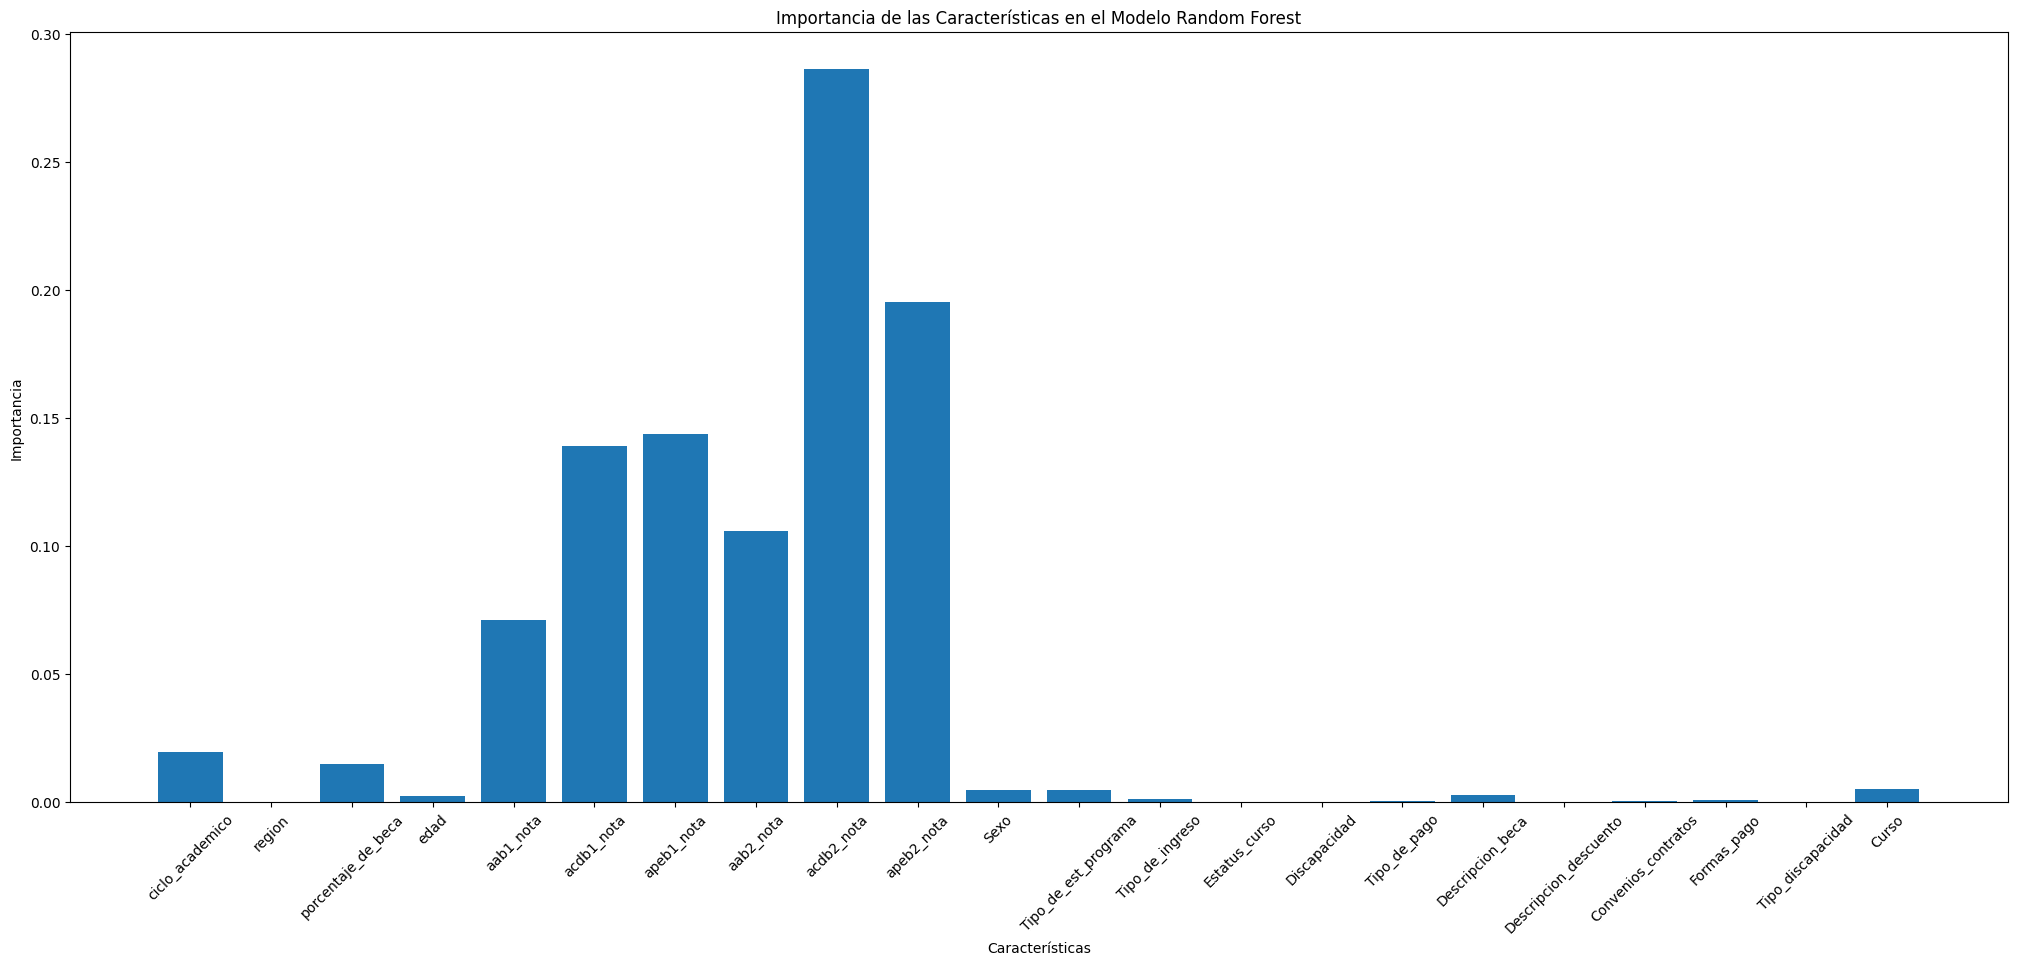

In [25]:
# Crear un gráfico de barras para visualizar la importancia
plt.figure(figsize=(25, 10))
plt.bar(list(X_resampled.columns), rf_model.feature_importances_)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Supongamos que 'rf_model' es tu modelo Random Forest entrenado
from sklearn.tree import export_text

# Visualiza el primer árbol del Random Forest
tree_rules = export_text(rf_model.estimators_[0], feature_names=list(X_resampled.columns))
print(tree_rules)


|--- acdb1_nota <= 3.07
|   |--- Sexo <= 1.50
|   |   |--- apeb2_nota <= 2.52
|   |   |   |--- acdb2_nota <= -0.50
|   |   |   |   |--- ciclo_academico <= 1.50
|   |   |   |   |   |--- aab1_nota <= 3.05
|   |   |   |   |   |   |--- Tipo_de_ingreso <= 3.50
|   |   |   |   |   |   |   |--- porcentaje_de_beca <= 80.00
|   |   |   |   |   |   |   |   |--- Curso <= 45.50
|   |   |   |   |   |   |   |   |   |--- apeb1_nota <= 2.44
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- apeb1_nota >  2.44
|   |   |   |   |   |   |   |   |   |   |--- aab1_nota <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- aab1_nota >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |--- Curso >  45.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- porcentaje_de_beca >  80.00
|   |   | 